In [ ]:
import numpy as np
import pandas as pd
import cv2
import random
import os

: 

In [2]:
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from tqdm import tqdm
from tools.inkmlparser import InkMLParser
from tools.boundingbox import BoundingBoxUtils

In [3]:
ink_ml_parser = InkMLParser()

In [4]:
folder = "trainData_2012_part1/"

files = os.listdir("./data/train/" + folder)

equations = []

for file in tqdm(files):
    equation = ink_ml_parser.inkml_to_labelled_image("./data/train/" + folder + file)
    if (not equation == None):
        equations.append(equation)

100%|██████████| 631/631 [00:05<00:00, 119.32it/s]


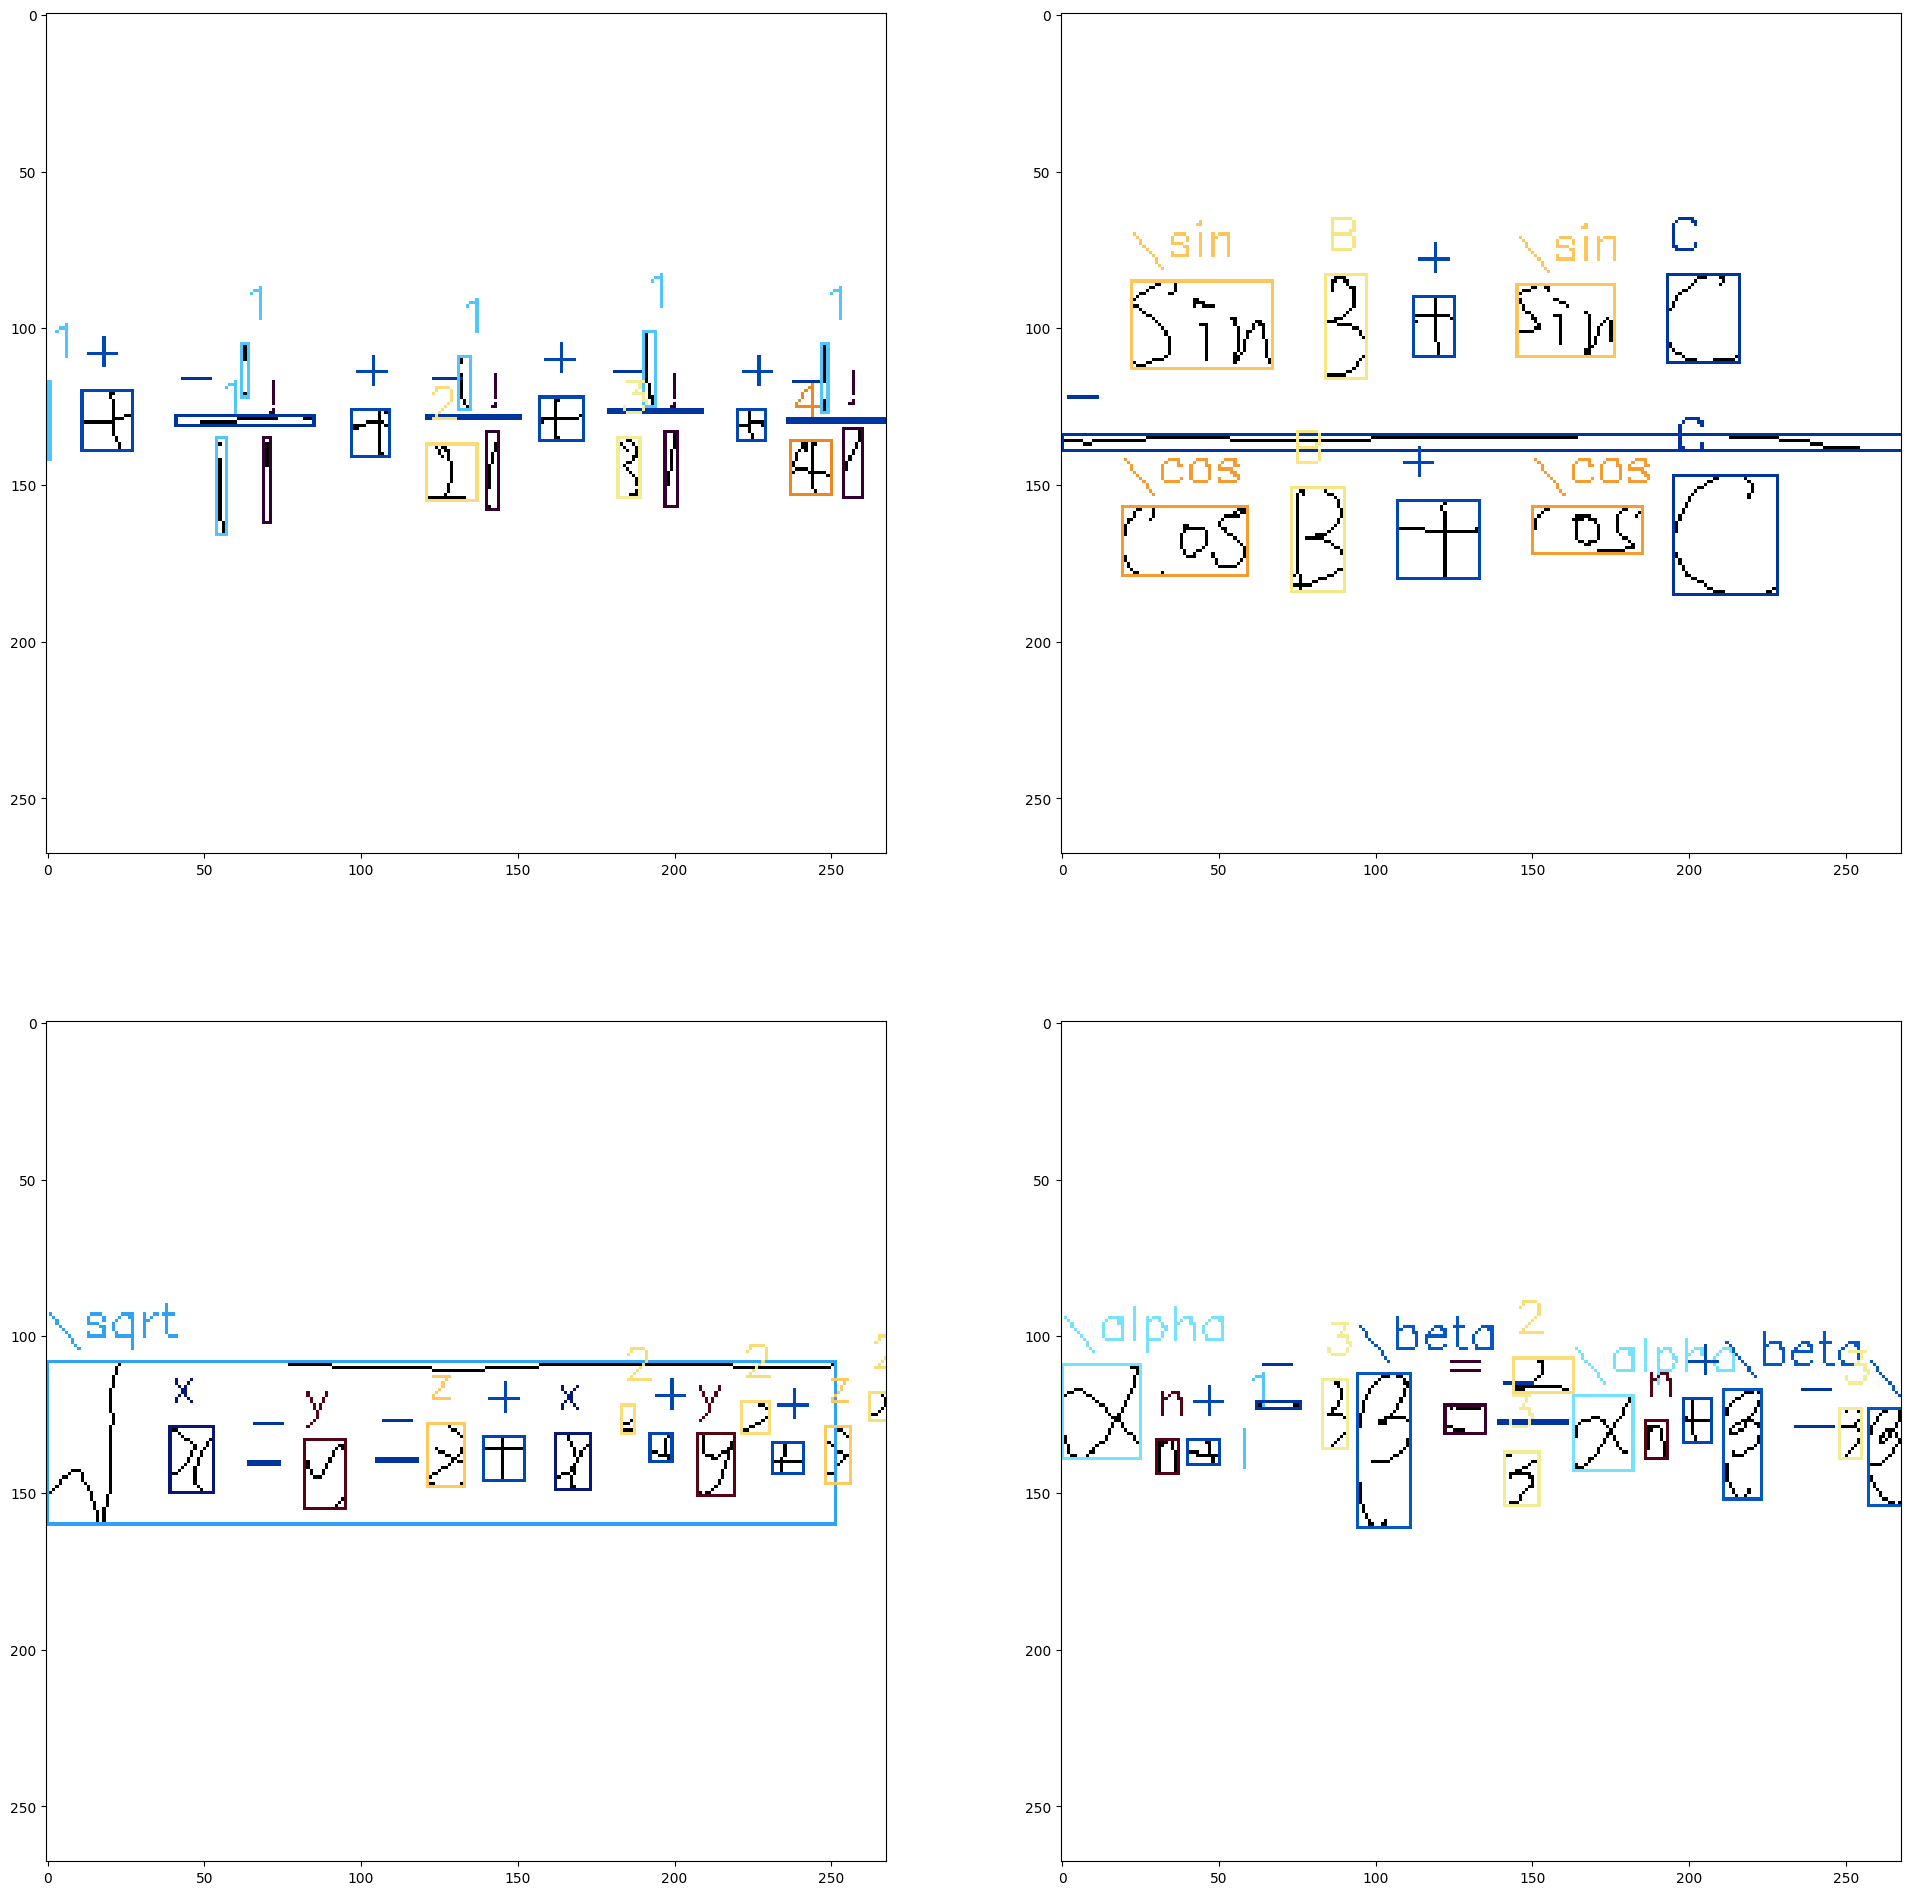

In [5]:
fig = plt.figure(figsize=([24, 24]))

for i in range(4):
    fig.add_subplot(2, 2, i + 1)

    index = random.randint(0, len(equations) - 1)
    equation = equations[index]
    
    img = BoundingBoxUtils.draw_bounding_box(1 - equation[0], equation[2], labels=equation[1])

    plt.imshow(img)

In [6]:
for equation in tqdm(equations):
    label_map, equation[1] = ink_ml_parser.reorganize_labels(equation[1])
    equation[2] = BoundingBoxUtils.normalize(equation[2], equation[0].shape)

print(str(len(label_map)) + " symbols detected")

100%|██████████| 630/630 [00:00<00:00, 24999.87it/s]

50 symbols detected


[20, 1, 11, 20, 2, 10, 21, 1, 11, 21, 2, 10, 22, 1, 11, 22, 2]
['x', '1', '-', 'x', '2', '+', 'y', '1', '-', 'y', '2', '+', 'z', '1', '-', 'z', '2']


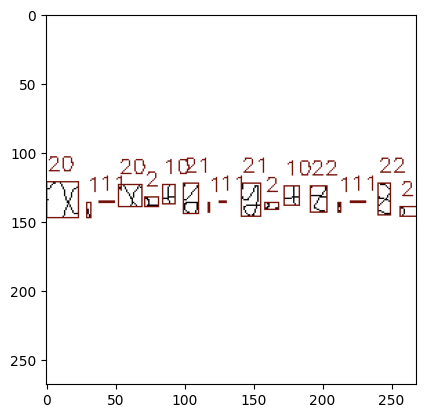

In [7]:
index = random.randint(0, len(equations))
equation = equations[index]

img = BoundingBoxUtils.draw_bounding_box(1 - equation[0], equation[2], labels=equation[1], normalized=True)

print(equation[1])
print([label_map[label] for label in equation[1]])
plt.imshow(img)